In [29]:
"""
Clustering approach to the concentrations of NOx for the 33 boroughs of Greater London plus NonGLA
"""

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

emissions_df = pd.read_excel('../data//LAEI2013_Emissions_Summary-NOx_v1.1.xlsx', sheet_name='NOx by Grid Exact Cut',
                             skiprows=3)
concentrations_df = pd.read_csv('../data/PostLAEI2013_2013_NOx.csv')

concentrations_df.head()
print(concentrations_df.isnull().sum())

concentrations_df.head()

concentrations_df = concentrations_df.rename(columns={
    'x': 'Easting',
    'y': 'Northing',
    'year': 'Year'
})

merged_df = pd.merge(concentrations_df, emissions_df, on=['Easting', 'Northing', 'Year'], how='inner')

print("Merged Data:")
display(merged_df)
merged_df.to_csv("../data/concentrations_merged_output.csv")

x        0
y        0
conct    0
year     0
dtype: int64
Merged Data:


,Easting,Northing,conct,Year,LAEI 1km2 ID,GRID_ExactCut_ID,Borough,Zone,Household and Garden,Small Waste and Accidental Fires,...,Diesel Car,Electric Car,Petrol LGV,Diesel LGV,Electric LGV,TfL Bus,Non-TfL Bus and Coach,Artic HGV,Rigid HGV,Total
0,501500,170500,56.87044,2013,11577,258,NonGLA,NonGLA,0.023479,0.002008,...,17.483541,0,0.135210,6.173631,0,0.167362,2.005301,6.539005,4.647952,43.364595
1,501500,187500,56.68350,2013,8653,224,NonGLA,NonGLA,0.011739,0.000367,...,14.099647,0,0.117319,5.491909,0,0.126726,0.882398,6.422596,3.777841,35.585632
2,502500,167500,33.61423,2013,12094,288,NonGLA,NonGLA,0.005870,0.000187,...,12.429571,0,0.101858,5.498087,0,0.186480,0.860553,4.819511,3.294308,32.519997
3,502500,168500,31.32178,2013,11922,275,NonGLA,NonGLA,0.011739,0.010782,...,0.647922,0,0.003241,0.255436,0,0.024594,0.027844,0.084129,0.296846,3.355043
4,502500,169500,32.42097,2013,11750,265,NonGLA,NonGLA,0.012473,0.003986,...,0.401891,0,0.002391,0.183494,0,0.051577,0.055494,0.017542,0.093720,2.728494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,560500,186500,24.63184,2013,8884,2774,Havering,Outer,0.000000,0.000000,...,0.071788,0,0.000351,0.030554,0,0.000000,0.018812,0.003012,0.021593,0.729473
3212,560500,187500,24.59677,2013,8712,1403,NonGLA,NonGLA,0.001407,0.000037,...,0.064020,0,0.000258,0.023901,0,0.006968,0.007889,0.002973,0.021317,0.399874
3213,560500,187500,24.59677,2013,8712,1404,Havering,Outer,0.000794,0.000021,...,0.069101,0,0.000305,0.027367,0,0.000000,0.016896,0.004751,0.025492,0.421427
3214,561500,185500,23.83519,2013,9057,2133,NonGLA,NonGLA,0.000000,0.000000,...,0.002080,0,0.000010,0.000725,0,0.000000,0.000000,0.000000,0.000000,0.064214


In [10]:
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(init='random', n_clusters=34, random_state=42, n_init=10,
                max_iter=50)  # using 42 as the random_state to ensure consistent results from multiple runs

# Data standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(concentrations_df.iloc[:, 0:2])  # Removing the year column

kmeans.fit(features_scaled)

print(f'Iteration count {kmeans.n_iter_}')
print(f'Lowest SSE is {kmeans.inertia_}')

labels = kmeans.labels_

concentrations_df['cluster'] = labels

display(concentrations_df)
concentrations_df.to_csv("../data/clustering_output.csv")

Iteration count 50
Lowest SSE is 350305.5442667513


,x,y,conct,year,x_1km,y_1km,cluster
0,501460,170580,49.21837,2013,501,170,2
1,501460,170600,49.78666,2013,501,170,2
2,501460,170620,50.36728,2013,501,170,2
3,501460,170640,50.94635,2013,501,170,2
4,501460,170660,51.51179,2013,501,170,2
...,...,...,...,...,...,...,...
5856423,561980,185040,23.47701,2013,561,185,22
5856424,561980,185060,23.46760,2013,561,185,22
5856425,561980,185080,23.46071,2013,561,185,22
5856426,561980,185100,23.45906,2013,561,185,22


/tmp/ipykernel_57181/1123633580.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


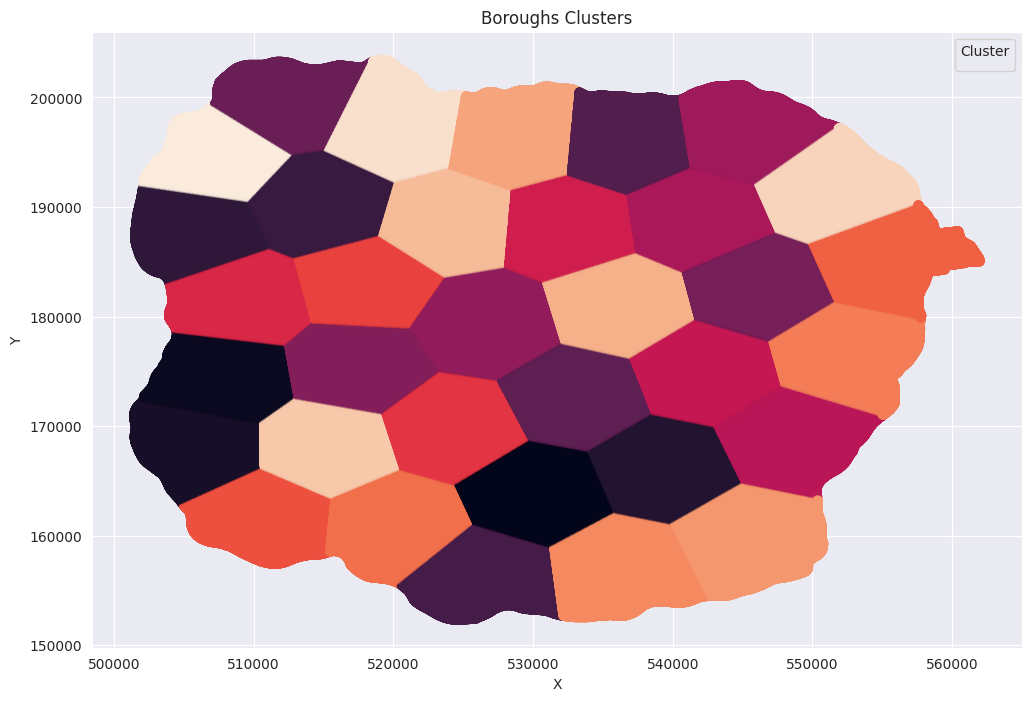

In [11]:
# Data visualization
plt.figure(figsize=(12, 8))
plt.scatter(concentrations_df['x'], concentrations_df['y'], c=labels)
plt.title('Boroughs Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Cluster')
plt.show()

# TODO: Label each cluster using this tool: https://gridreferencefinder.com/

In [12]:
### FAILED EXPERIMENT USING GEOPANDAS
# Mapping the clusters using geopandas

import geopandas as gpd
from shapely.geometry import Point

boroughs = gpd.read_file("../data/Borough_boundary.shp")

print("Boroughs CRS:", boroughs.crs)
display(boroughs)

geometry = gpd.points_from_xy(concentrations_df['x'], concentrations_df['y'], crs=boroughs.crs)
geo_df = gpd.GeoDataFrame(concentrations_df, geometry=geometry)
geo_df.set_crs(boroughs.crs, inplace=True)

## Spatially join the boroughs with the geo_df
geo_df = gpd.sjoin(geo_df, boroughs, how='left', predicate='within')

display(geo_df)

Boroughs CRS: EPSG:27700


,geometry
0,"POLYGON ((549895.001 181460.618, 549883.705 18..."
1,"POLYGON ((524579.9 198355.223, 524594.304 1983..."
2,"POLYGON ((547448.007 170380.319, 547413.204 17..."
3,"POLYGON ((515767.199 186062.821, 515860.006 18..."
4,"POLYGON ((540373.604 157530.416, 540361.203 15..."
5,"POLYGON ((528840.206 187217.82, 528834.607 187..."
6,"POLYGON ((531133.801 181279.02, 531132.003 181..."
7,"POLYGON ((529357.402 161725.715, 529352.9 1617..."
8,"POLYGON ((515647.201 178787.823, 515608.804 17..."
9,"POLYGON ((531023.506 200933.625, 531039.906 20..."


,x,y,conct,year,x_1km,y_1km,cluster,geometry,index_right
0,501460,170580,49.21837,2013,501,170,2,POINT (501460 170580),NaN
1,501460,170600,49.78666,2013,501,170,2,POINT (501460 170600),NaN
2,501460,170620,50.36728,2013,501,170,2,POINT (501460 170620),NaN
3,501460,170640,50.94635,2013,501,170,2,POINT (501460 170640),NaN
4,501460,170660,51.51179,2013,501,170,2,POINT (501460 170660),NaN
...,...,...,...,...,...,...,...,...,...
5856423,561980,185040,23.47701,2013,561,185,22,POINT (561980 185040),NaN
5856424,561980,185060,23.46760,2013,561,185,22,POINT (561980 185060),NaN
5856425,561980,185080,23.46071,2013,561,185,22,POINT (561980 185080),NaN
5856426,561980,185100,23.45906,2013,561,185,22,POINT (561980 185100),NaN
